#### Importing necessary libraries

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the Dataset and getting basic information

In [126]:
data = pd.read_csv('../dataset/car_data.csv')

In [127]:
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [128]:
data.shape

(1000, 5)

In [129]:
data.info

<bound method DataFrame.info of      User ID  Gender  Age  AnnualSalary  Purchased
0        385    Male   35         20000          0
1        681    Male   40         43500          0
2        353    Male   49         74000          0
3        895    Male   40        107500          1
4        661    Male   25         79000          0
..       ...     ...  ...           ...        ...
995      863    Male   38         59000          0
996      800  Female   47         23500          0
997      407  Female   28        138500          1
998      299  Female   48        134000          1
999      687  Female   44         73500          0

[1000 rows x 5 columns]>

In [130]:
data.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [131]:
data.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


#### Data Preprocessing

In [132]:
data.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

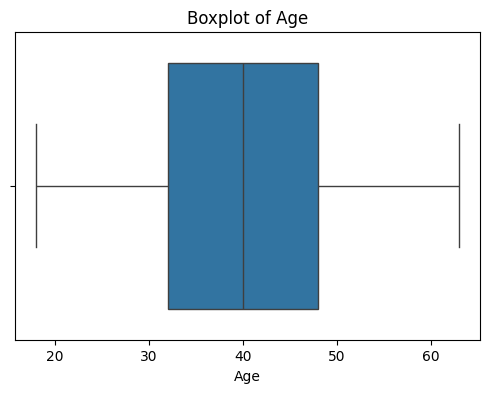

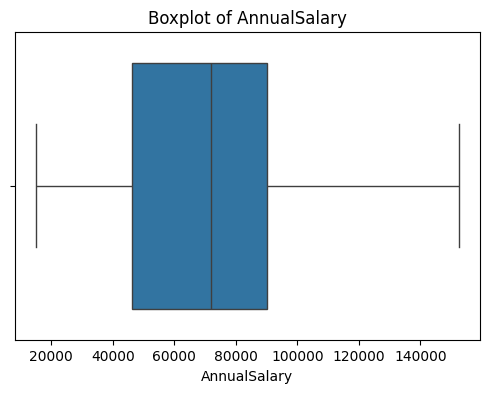

In [133]:
numerical_cols = ['Age', 'AnnualSalary']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

#### Data Analysis

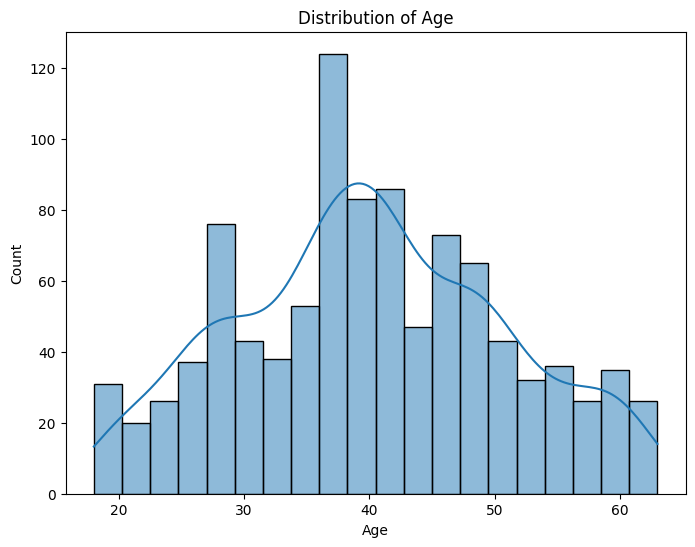

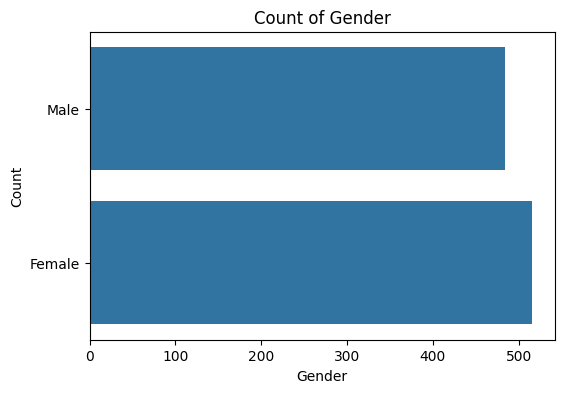

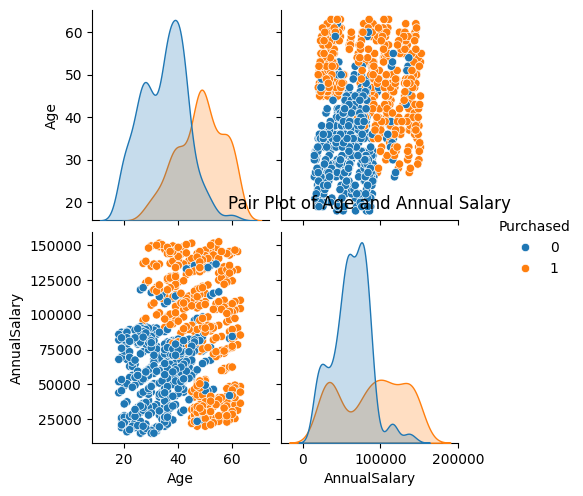

In [134]:
# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Count plot of Gender
plt.figure(figsize=(6, 4))
sns.countplot(data['Gender'])
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Pair plot for numerical variables
sns.pairplot(data, vars=['Age', 'AnnualSalary'], hue='Purchased')
plt.title('Pair Plot of Age and Annual Salary')
plt.show()


In [135]:
from sklearn.preprocessing import LabelEncoder

In [136]:
#Doing Label Encoding on required columns
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])


In [137]:
data

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0
...,...,...,...,...,...
995,863,1,38,59000,0
996,800,0,47,23500,0
997,407,0,28,138500,1
998,299,0,48,134000,1


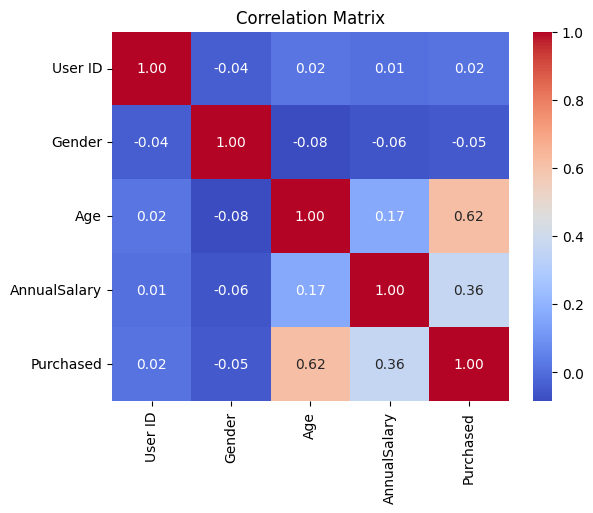

In [138]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


We can observe that age has a correlation with Purchased column this means that age is a major contributing factor towards it

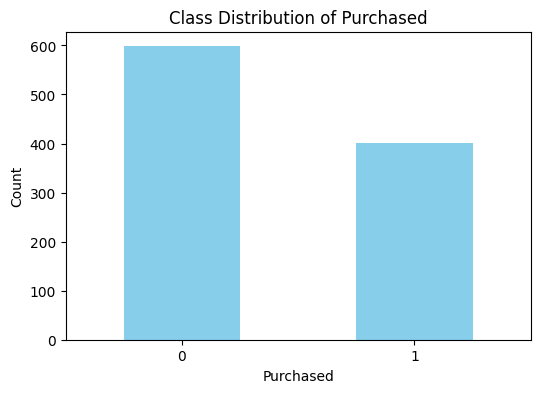

Imbalance Ratio: 0.67


In [139]:
class_counts = data['Purchased'].value_counts()

plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Purchased')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

imbalance_ratio = class_counts.min() / class_counts.max()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

##### Splitting Dependent and Independent Columns

In [140]:
X = data.drop('Purchased', axis=1)
y = data['Purchased']

##### Feature Scaling

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
scaler = MinMaxScaler()
numerical_cols = ['Age', 'AnnualSalary']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

##### Balancing Data using SMOTE

In [141]:
from imblearn.over_sampling import SMOTE

In [142]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y) 
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Purchased'])], axis=1)

In [143]:
print(balanced_data['Purchased'].value_counts())

Purchased
0    598
1    598
Name: count, dtype: int64


#### Train Test Split

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
balanced_data

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0
...,...,...,...,...,...
1191,421,0,49,139500,1
1192,428,0,51,43677,1
1193,880,0,57,36500,1
1194,479,0,58,30627,1


In [146]:
balanced_data = balanced_data.drop('User ID', axis=1)

X_balanced = balanced_data.drop('Purchased', axis=1)
y_balanced = balanced_data['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=0)

In [147]:
balanced_data

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0
...,...,...,...,...
1191,0,49,139500,1
1192,0,51,43677,1
1193,0,57,36500,1
1194,0,58,30627,1


In [148]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (956, 3), y_train shape: (956,)
X_test shape: (240, 3), y_test shape: (240,)


In [149]:
X_train

,Gender,Age,AnnualSalary
678,0,53,90500
616,1,60,42000
933,0,34,52500
1148,0,50,36018
1011,0,39,124919
...,...,...,...
1033,1,42,93162
763,0,50,142500
835,1,42,53500
559,0,30,62000


### Model Training

In [150]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#### Logistic Regression

In [151]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

In [152]:
logistic_conf_matrix = confusion_matrix(y_test, logistic_predictions)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_class_report = classification_report(y_test, logistic_predictions)

print("Logistic Regression Metrics:")
print(f"Confusion Matrix:\n{logistic_conf_matrix}")
print(f"\nAccuracy Score: {logistic_accuracy:.4f}")
print(f"\nClassification Report:\n{logistic_class_report}")


Logistic Regression Metrics:
Confusion Matrix:
[[  0 121]
 [  0 119]]

Accuracy Score: 0.4958

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.50      1.00      0.66       119

    accuracy                           0.50       240
   macro avg       0.25      0.50      0.33       240
weighted avg       0.25      0.50      0.33       240



d:\Car-Purchase-Prediction\siproject\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Car-Purchase-Prediction\siproject\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Car-Purchase-Prediction\siproject\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree

In [153]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

In [154]:
tree_conf_matrix = confusion_matrix(y_test, tree_predictions)
tree_accuracy = accuracy_score(y_test, tree_predictions)
tree_class_report = classification_report(y_test, tree_predictions)

print("Decision Trees Metrics:")
print(f"Confusion Matrix:\n{tree_conf_matrix}")
print(f"\nAccuracy Score: {tree_accuracy:.4f}")
print(f"\nClassification Report:\n{tree_class_report}")


Decision Trees Metrics:
Confusion Matrix:
[[111  10]
 [ 16 103]]

Accuracy Score: 0.8917

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       121
           1       0.91      0.87      0.89       119

    accuracy                           0.89       240
   macro avg       0.89      0.89      0.89       240
weighted avg       0.89      0.89      0.89       240



#### Random Forest Classifier

In [155]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)

In [156]:
forest_conf_matrix = confusion_matrix(y_test, forest_predictions)
forest_accuracy = accuracy_score(y_test, forest_predictions)
forest_class_report = classification_report(y_test, forest_predictions)

print("Random Forest Metrics:")
print(f"Confusion Matrix:\n{forest_conf_matrix}")
print(f"\nAccuracy Score: {forest_accuracy:.4f}")
print(f"\nClassification Report:\n{forest_class_report}")

Random Forest Metrics:
Confusion Matrix:
[[108  13]
 [ 12 107]]

Accuracy Score: 0.8958

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       121
           1       0.89      0.90      0.90       119

    accuracy                           0.90       240
   macro avg       0.90      0.90      0.90       240
weighted avg       0.90      0.90      0.90       240



#### Gradient Boosting Classifier

In [157]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

In [158]:
gb_conf_matrix = confusion_matrix(y_test, gb_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_class_report = classification_report(y_test, gb_predictions)

print("Gradient Boosting Metrics:")
print(f"Confusion Matrix:\n{gb_conf_matrix}")
print(f"\nAccuracy Score: {gb_accuracy:.4f}")
print(f"\nClassification Report:\n{gb_class_report}")

Gradient Boosting Metrics:
Confusion Matrix:
[[111  10]
 [  8 111]]

Accuracy Score: 0.9250

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       121
           1       0.92      0.93      0.93       119

    accuracy                           0.93       240
   macro avg       0.93      0.93      0.93       240
weighted avg       0.93      0.93      0.93       240



#### Support Vector Classification

In [159]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [160]:
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_class_report = classification_report(y_test, svm_predictions)

print("SVM Metrics:")
print(f"Confusion Matrix:\n{svm_conf_matrix}")
print(f"\nAccuracy Score: {svm_accuracy:.4f}")
print(f"\nClassification Report:\n{svm_class_report}")

SVM Metrics:
Confusion Matrix:
[[97 24]
 [45 74]]

Accuracy Score: 0.7125

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.80      0.74       121
           1       0.76      0.62      0.68       119

    accuracy                           0.71       240
   macro avg       0.72      0.71      0.71       240
weighted avg       0.72      0.71      0.71       240



### Model Evaluation

In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    'Logistic Regression': logistic_predictions,
    'Decision Tree': tree_predictions,
    'Random Forest': forest_predictions,
    'Gradient Boosting': gb_predictions,
    'SVM': svm_predictions
}

for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}\n")


Metrics for Logistic Regression:
Accuracy: 0.4958, Precision: 0.4958, Recall: 1.0000
F1-score: 0.6630, ROC-AUC: 0.5000

Metrics for Decision Tree:
Accuracy: 0.8917, Precision: 0.9115, Recall: 0.8655
F1-score: 0.8879, ROC-AUC: 0.8915

Metrics for Random Forest:
Accuracy: 0.8958, Precision: 0.8917, Recall: 0.8992
F1-score: 0.8954, ROC-AUC: 0.8959

Metrics for Gradient Boosting:
Accuracy: 0.9250, Precision: 0.9174, Recall: 0.9328
F1-score: 0.9250, ROC-AUC: 0.9251

Metrics for SVM:
Accuracy: 0.7125, Precision: 0.7551, Recall: 0.6218
F1-score: 0.6820, ROC-AUC: 0.7118



In [162]:
test_values = np.array([[1,35,20000]])

prediction = gb_model.predict(test_values)

print(f"The prediction for the given values is: {prediction[0]}")

The prediction for the given values is: 0


d:\Car-Purchase-Prediction\siproject\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


##### Dumping the model using Pickle

In [163]:
import pickle

with open('../gb_model.pkl', 'wb') as model_file:
    pickle.dump(gb_model, model_file)